## Thresholding

Mounted at /content/drive
Single Threshold (128):
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]



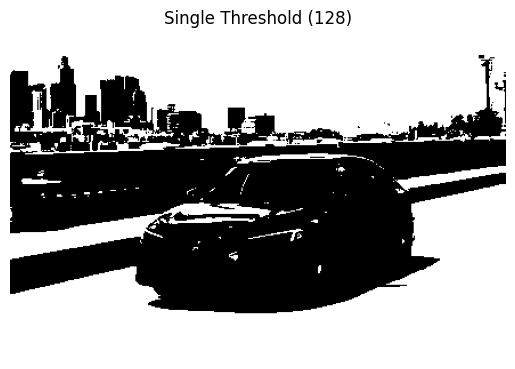

Dual Threshold (100, 200):
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]



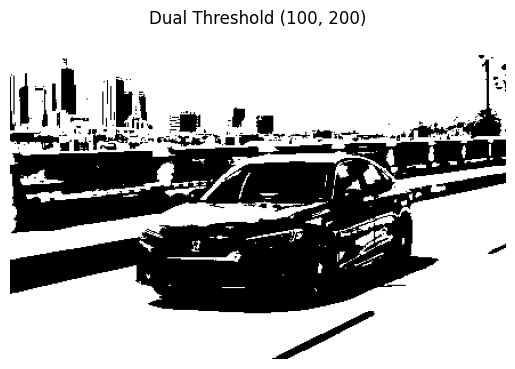

Grayscale Threshold with Range (100, 200):
[[171 170 170 ... 163 163 163]
 [170 169 169 ... 163 163 164]
 [170 169 169 ... 164 164 164]
 ...
 [167 167 168 ... 166 165 165]
 [168 169 169 ... 168 166 166]
 [168 169 169 ... 168 167 167]]



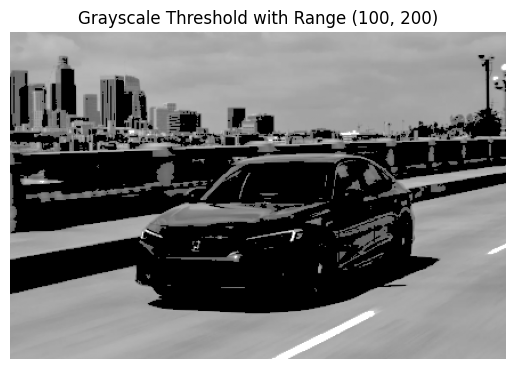

In [ ]:
from google.colab import drive
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def load_image(image_path):
    image = Image.open(image_path).convert('L')
    return np.array(image)

# Thresholding operations
def single_threshold(image_array, threshold): #image er pixel value
    return np.where(image_array > threshold, 255, 0)

def dual_threshold(image_array, low_threshold, high_threshold):
    return np.where((image_array > low_threshold) & (image_array <= high_threshold), 255, 0)

def grayscale_threshold_with_range(image_array, low_threshold, high_threshold):
    return np.where(image_array < low_threshold, 0,
                    np.where(image_array > high_threshold, 255, image_array))

def display_image(image_array, title):
    plt.imshow(np.clip(image_array, 0, 255), cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    # Step 1: Mount Google Drive
    drive.mount('/content/drive')

    # Path to the image in Google Drive
    image_path = '/content/drive/MyDrive/car.png'  # Update with your Drive path
    image_array = load_image(image_path)

    # Perform thresholding operations
    single_threshold_image = single_threshold(image_array, 128)  #threshold 128
    dual_threshold_image = dual_threshold(image_array, 100, 200)
    grayscale_threshold_image = grayscale_threshold_with_range(image_array, 100, 200)  # Keep values between 100 and 200 unchanged

    # Print and display resulting arrays and images
    threshold_operations = {
        "Single Threshold (128)": single_threshold_image,
        "Dual Threshold (100, 200)": dual_threshold_image,
        "Grayscale Threshold with Range (100, 200)": grayscale_threshold_image
    }

    for title, image in threshold_operations.items():
        print(f"{title}:\n{image}\n")
        display_image(image, title)

## Gray Level Slicing

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Gray Level Slicing (1st Approach):
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]



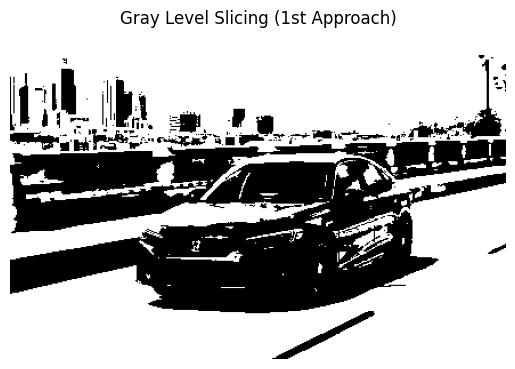

Gray Level Slicing (2nd Approach):
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]



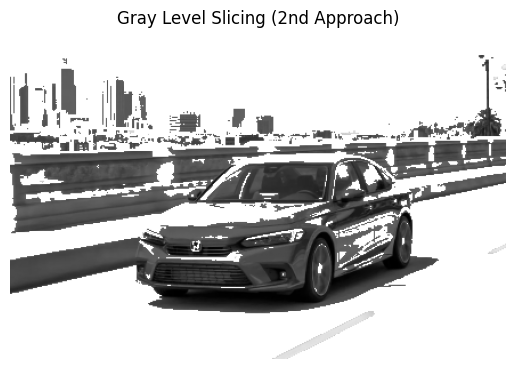

In [ ]:
# 1st Approach: Highlight the specified range and suppress others to 0
def gray_level_slicing_1st_approach(image_array, low_threshold, high_threshold, highlight_value=255):
  return np.where((image_array >= low_threshold) & (image_array <= high_threshold), highlight_value, 0)

# 2nd Approach: Highlight the specified range, but keep other pixel values unchanged
def gray_level_slicing_2nd_approach(image_array, low_threshold, high_threshold, highlight_value=255):
    return np.where((image_array >= low_threshold) & (image_array <= high_threshold), highlight_value, image_array)

# Display image using matplotlib
def display_image(image_array, title):
    plt.imshow(np.clip(image_array, 0, 255), cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
   # Step 1: Mount Google Drive
    drive.mount('/content/drive')

    # Path to the image in Google Drive
    image_path = '/content/drive/MyDrive/car.png'  # Update with your Drive path
    image_array = load_image(image_path)

    # Define thresholds
    low_threshold = 100
    high_threshold = 200

    # Perform Gray Level Slicing using both approaches
    sliced_image_1st_approach = gray_level_slicing_1st_approach(image_array, low_threshold, high_threshold)
    sliced_image_2nd_approach = gray_level_slicing_2nd_approach(image_array, low_threshold, high_threshold)

    # Print and display resulting images
    slicing_operations = {
        "Gray Level Slicing (1st Approach)": sliced_image_1st_approach,
        "Gray Level Slicing (2nd Approach)": sliced_image_2nd_approach
    }

    for title, image in slicing_operations.items():
        print(f"{title}:\n{image}\n")
        display_image(image, title)
